In [1]:
import pickle
import os

allPt: str = "../data/allPt.pkl";
assert os.path.exists(allPt);

with open(allPt, "rb") as f:
    ap = pickle.load(f);

print(type(ap))

<class 'dict'>


In [3]:
print(list(ap.keys())[:10])

['1000074', '1000194', '1000258', '1000280', '1000299', '1000314', '1000339', '1000377', '1000404', '1000441']


In [2]:
with open("../data/kgEmb2.pkl", "rb") as f:
    icdMap = pickle.load(f)[0];

In [4]:
import sys;
sys.path.append("..");

from obj.pt import *;

# pt: Pt = ap["5056585"];
pt: Pt = ap["5571723"];
print(pt.dem.sab, pt.dem.aYr, pt.dem.aMo, pt.dem.eth)
for evt in pt.evtList:
    if evt.type != EvtClass.Dig:
        continue;
    print(evt.time, evt.cont[0], end="");
    try:
        icdMap[evt.cont[0]];
        print("\tExists");
    except:
        print("\tNo embedding")

SexAtBirth.Male 1957 1 1001
2012-07-26 D696	Exists
2012-07-26 F112	Exists
2012-07-26 I10	Exists
2012-07-26 K210	No embedding
2012-07-26 L031	No embedding
2012-07-26 R460	No embedding
2012-07-26 Z722	No embedding
2012-07-26 Z864	No embedding
2012-07-27 I951	Exists
2012-07-27 K221	Exists
2012-07-27 Z915	No embedding
2018-06-06 E669	Exists
2018-06-06 E780	No embedding
2018-06-06 H269	Exists
2018-06-06 K590	No embedding
2019-01-23 E538	Exists
2019-01-23 Z290	No embedding
2019-09-08 E119	No embedding
2019-09-08 E86	No embedding
2019-09-08 J440	No embedding
2019-09-08 R062	Exists
2019-09-08 R268	No embedding
2019-09-08 R51	No embedding
2019-09-08 R600	Exists
2019-09-08 R798	No embedding
2019-09-08 T403	No embedding
2019-09-08 T510	No embedding
2019-09-08 U071	No embedding
2019-09-08 Z921	No embedding
2021-05-13 F329	Exists
2021-05-13 J449	Exists
2021-05-13 J459	No embedding
2021-05-13 R296	No embedding
2021-05-13 R468	No embedding
2021-05-13 R55	Exists
2021-05-13 T110	No embedding
2021-05-13

In [47]:
import sys;
sys.path.append("..");

from obj.pt import *;

ptIcdStt: Dict[str, List[int]] = dict();
icdMissStt: Dict[str, int] = dict();
icdHitStt: Dict[str, int] = dict();
out: str = "allIcds.txt";
allIcds: List[str] = [];

for _ptk in list(ap.keys()):
    pt: Pt = ap[_ptk];
    ptIcdStt[_ptk] = [0, 0];
    # print(pt.dem.sab, pt.dem.aYr, pt.dem.aMo, pt.dem.eth)
    for evt in pt.evtList:
        if evt.type != EvtClass.Dig:
            continue;
        # print(evt.time, evt.cont[0], end="");
        ptIcdStt[_ptk][0] += 1;
        allIcds.append(evt.cont[0]);
        try:
            icdMap[evt.cont[0]];
            try:
                icdHitStt[evt.cont[0]] += 1;
            except:
                icdHitStt[evt.cont[0]] = 1;
        except:
            ptIcdStt[_ptk][1] += 1;
            try:
                icdMissStt[evt.cont[0]] += 1;
            except:
                icdMissStt[evt.cont[0]] = 1;

with open("icdHit.txt", "w") as f:
    for k in list(icdHitStt.keys()):
        f.write(f"{k}\n");

In [8]:
print(f"Total pt: {len(list(ptIcdStt.keys()))}")

ptIcdExtRate: List[float] = [];
for _ptk in list(ap.keys()):
    ptIcdExtRate.append(0 if ptIcdStt[_ptk][0] == 0 else ((ptIcdStt[_ptk][0] - ptIcdStt[_ptk][1]) / ptIcdStt[_ptk][0]));
ptIcdExtRate: np.ndarray = np.array(ptIcdExtRate);
print(f"Pt ICD hit rate: {np.quantile(prIcdExtRate, (0, .25, .5, .75, .9, 1))}")

icdMiss2dig: Dict[str, int] = dict();
icdMissPrim: Dict[str, int] = dict();
for k in list(icdMissStt.keys()):
    try:
        icdMiss2dig[k[:2]] += icdMissStt[k];
    except:
        icdMiss2dig[k[:2]] = icdMissStt[k];
    try:
        icdMissPrim[k[0]] += icdMissStt[k];
    except:
        icdMissPrim[k[0]] = icdMissStt[k];

Total pt: 502131
Pt ICD hit rate: [0.         0.07142857 0.25       0.34375    0.5        1.        ]


In [12]:
icdMiss2dNam: np.ndarray = np.array(list(icdMiss2dig.keys()));
icdMiss2dVal: np.ndarray = np.array([icdMiss2dig[k] for k in icdMiss2dNam]);
_2dvalArg: np.ndarray = np.argsort(icdMiss2dVal);
icdMiss2dVal = icdMiss2dVal[_2dvalArg];
icdMiss2dNam = icdMiss2dNam[_2dvalArg];

icdMissPrNam: np.ndarray = np.array(list(icdMissPrim.keys()));
icdMissPrVal: np.ndarray = np.array([icdMissPrim[k] for k in icdMissPrNam]);
_prvalArg: np.ndarray = np.argsort(icdMissPrVal);
icdMissPrVal = icdMissPrVal[_prvalArg];
icdMissPrNam = icdMissPrNam[_prvalArg];

In [ ]:
import matplotlib.pyplot as plt

def plot_bar_chart(x: list, y: list, title: str = "Bar Chart", xlabel: str = "Categories", ylabel: str = "Values", log: bool = True, legand: bool = True):
    if log:
        valMean = np.log(np.mean(y));
        valMed = np.log(np.median(y));
    else:
        valMean = np.mean(y);
        valMed = np.median(y);

    plt.figure(figsize=(10, 6))
    if log:
        plt.bar(x, np.log(y), color='skyblue')
    else:
        plt.bar(x, y, color='skyblue')
    
    mean_line = plt.axhline(valMean, color='red', linestyle='--', linewidth=2, label=f"Mean ({valMean:.2f})")
    median_line = plt.axhline(valMed, color='green', linestyle='-.', linewidth=2, label=f"Median ({valMed:.2f})")
    
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    if legand:
        plt.legend(handles=[mean_line, median_line])
    plt.show()

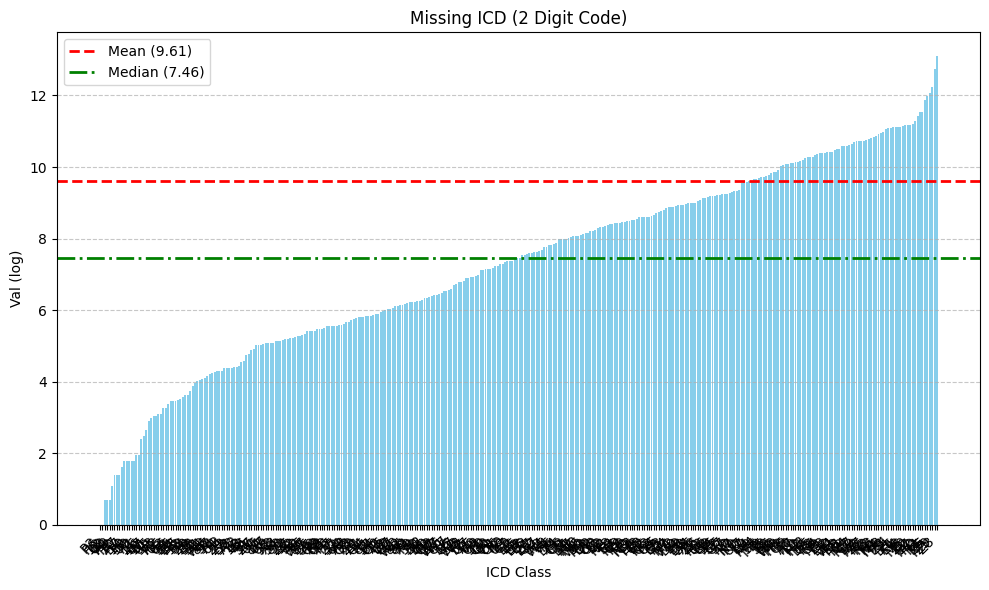

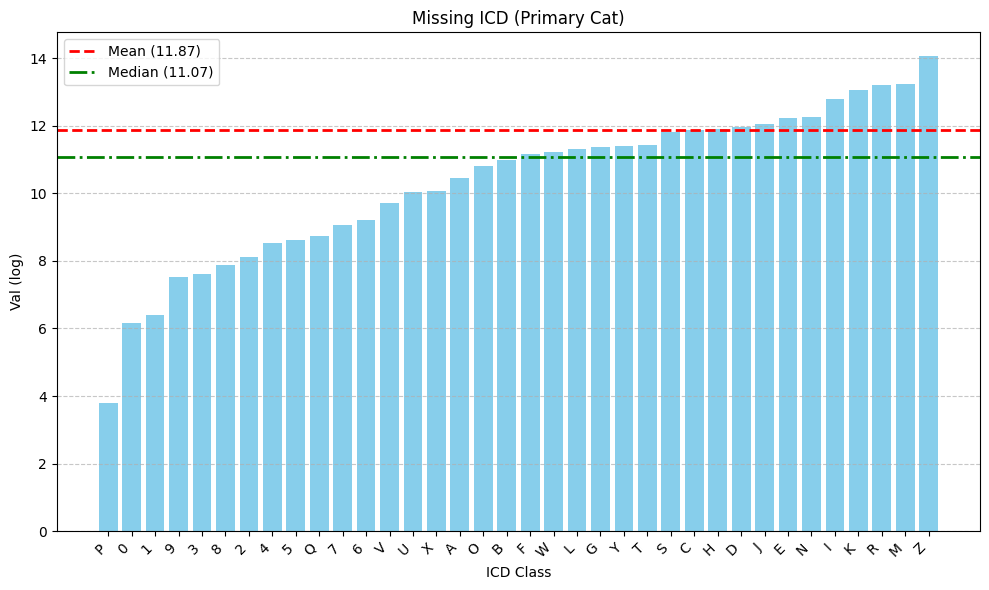

In [32]:
plot_bar_chart(icdMiss2dNam, icdMiss2dVal, "Missing ICD (2 Digit Code)", "ICD Class", "Val (log)")
plot_bar_chart(icdMissPrNam, icdMissPrVal, "Missing ICD (Primary Cat)", "ICD Class", "Val (log)")

In [ ]:
ptIcdMissRate: np.ndarray = np.sort(1 - ptIcdExtRate);
print(f"Pt ICD miss rate: {np.quantile(ptIcdMissRate, (0, .25, .5, .75, .9, 1))}")
print(f"Total pt: {len(ptIcdMissRate)}")
ptPlaceHolder: List[str] = [f"s{i}" for i in range(len(ptIcdMissRate))];

NameError: name 'legend' is not defined

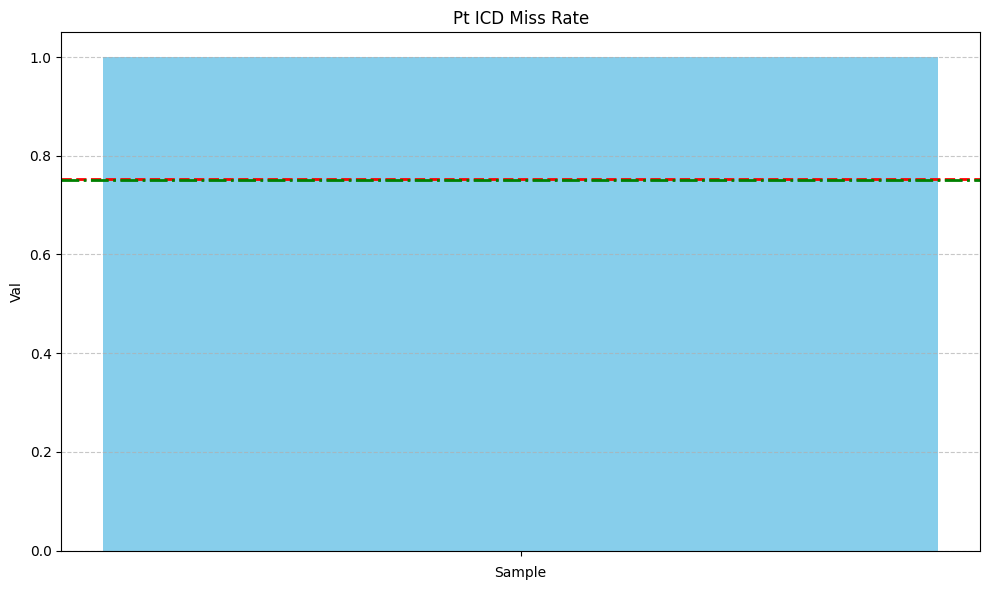

In [44]:
plot_bar_chart(ptPlaceHolder, ptIcdMissRate, "Pt ICD Miss Rate", "Sample", "Val", log=False, legand=False)